In [37]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

In [98]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = music[['loudness', 'ld']]
Y = music.bpm
knn.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [99]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
knn_w.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='distance')

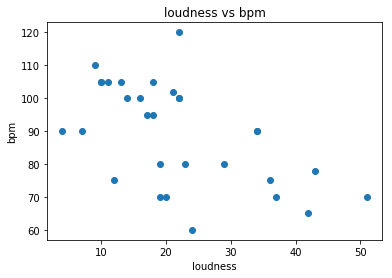

In [100]:
plt.scatter(music.loudness, music.bpm)
plt.xlabel('loudness')
plt.ylabel('bpm')
plt.title('loudness vs bpm')
plt.show()

In [101]:
music['d/l'] = music.duration / music.loudness
music['l/d'] = music.loudness / music.duration
music['ld'] = music.loudness * music.duration

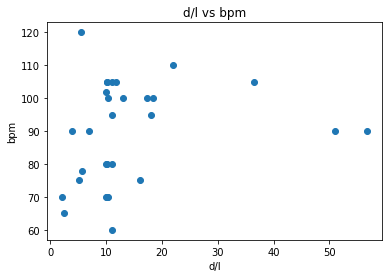

In [102]:
plt.scatter(music['d/l'], music.bpm)
plt.xlabel('d/l')
plt.ylabel('bpm')
plt.title('d/l vs bpm')
plt.show()

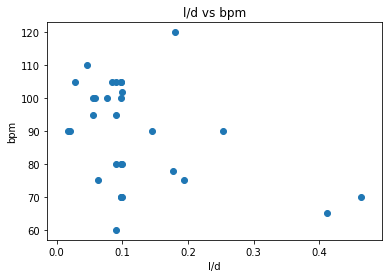

In [103]:
plt.scatter(music['l/d'], music.bpm)
plt.xlabel('l/d')
plt.ylabel('bpm')
plt.title('l/d vs bpm')
plt.show()

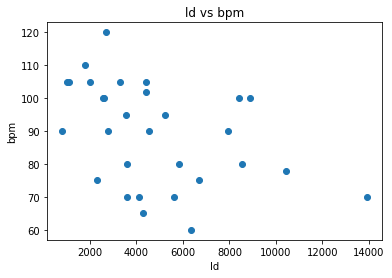

In [104]:
plt.scatter(music.ld, music.bpm)
plt.xlabel('ld')
plt.ylabel('bpm')
plt.title('ld vs bpm')
plt.show()

In [105]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.27 (+/- 0.96)
Weighted Accuracy: -0.05 (+/- 0.94)


Why don't you add the other feature and mess around with $k$ and weighting to see if you can do any better than we've done so far?

Conclusion: The model still fantastically bad, our predictors don't seem to be correlated with the outcome of interest. 